<a href="https://colab.research.google.com/github/apurvmishra99/algothon/blob/master/Getting_additional_data_(Refinitiv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Historical pricing data 

Query EDP to get end of day pricing data for a specific stock (AAPL)

In [0]:
#Global imports

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import requests
import json
import numpy as np

%matplotlib inline
plt.style.use('seaborn')

In [0]:
# Global functions - make HTTP GET reqeust
def get_data_request(url, requestData):
    dResp = requests.get(url, headers = {'X-api-key': access_token}, params = requestData);       

    
    if dResp.status_code != 200:
        print("Unable to get data. Code %s, Message: %s" % (dResp.status_code, dResp.text));
    else:
        print("Data access successful")
        jResp = json.loads(dResp.text);
        return jResp

<b><h2>Price History</b></h2>
<body>Call the end of day pricing API to retrieve daily data. Display the data in a simple chart and table</body>

In [0]:
ric = 'AAPL.O' # APPLE
start_date = '2016-11-01'
end_date = '2018-05-01'

RESOURCE_ENDPOINT = "https://dsa-stg-edp-api.fr-nonprod.aws.thomsonreuters.com/data/historical-pricing/beta1/views/summaries/" + ric
access_token = '84UtcrFtgs64TcUvk8jTwafpFLOPy04t7PWuEefX'  # your personal key for Data Science Accelerator access to Pricing Data
requestData = {
    "interval": "P1D",
    "start": start_date,
    "end": end_date,
    "fields": 'TRDPRC_1' #BID,ASK,OPEN_PRC,HIGH_1,LOW_1,TRDPRC_1,NUM_MOVES,TRNOVR_UNS
};

jResp = get_data_request(RESOURCE_ENDPOINT, requestData)


if jResp is not None:
    data = jResp[0]['data']
    headers = jResp[0]['headers']  
    names = [headers[x]['name'] for x in range(len(headers))]
    close_price = pd.DataFrame(data, columns=names )
    
close_price.columns = ['DATE', 'CLOSE']
close_price.set_index(pd.to_datetime(close_price.DATE), inplace=True) # set the index to be the DATE
close_price.sort_index(inplace=True)  # sort the dataframe by the newly created datetime index

close_price.head()

Data access successful


,DATE,CLOSE
DATE,,
2016-11-01,2016-11-01,111.49
2016-11-02,2016-11-02,111.59
2016-11-03,2016-11-03,109.83
2016-11-04,2016-11-04,108.84
2016-11-07,2016-11-07,110.41


### Moving averages

Calculate two moving averages, one for 20 and one for 50 days.

In [0]:
SMA1 = 20
SMA2 = 50

close_price['SMA20'] = close_price['CLOSE'].rolling(SMA1).mean()
close_price['SMA50'] = close_price['CLOSE'].rolling(SMA2).mean()

In [0]:
close_price.tail()

,DATE,CLOSE,SMA20,SMA50
DATE,,,,
2018-04-25,2018-04-25,163.65,170.4490,172.8534
2018-04-26,2018-04-26,164.22,170.3360,172.8510
2018-04-27,2018-04-27,162.32,170.0630,172.7500
2018-04-30,2018-04-30,165.26,169.9920,172.5954
2018-05-01,2018-05-01,169.10,170.0275,172.5288


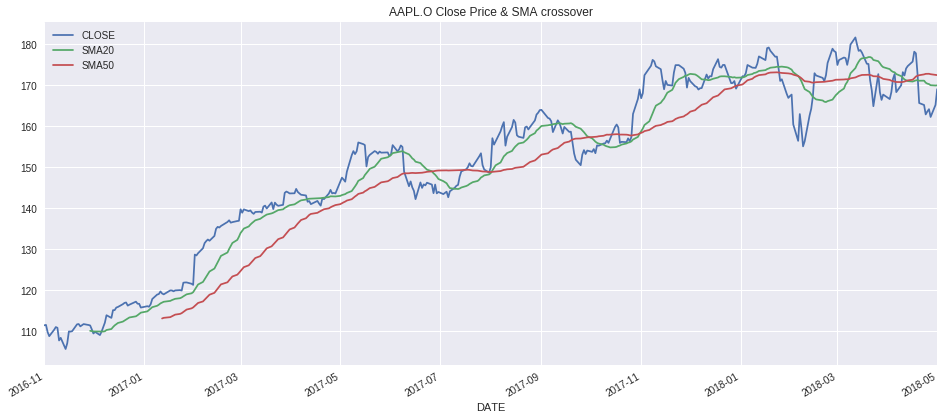

In [0]:
close_price.plot(title= ric + ' Close Price & SMA crossover',figsize=(16, 7))

Calculate 1 day and 1 month returns

In [0]:
close_price['1DReturns'] = close_price['CLOSE'].pct_change(1)
close_price['1MReturns'] = close_price['CLOSE'].pct_change(21)
close_price.tail()

,DATE,CLOSE,SMA20,SMA50,1DReturns,1MReturns
DATE,,,,,,
2018-04-25,2018-04-25,163.65,170.4490,172.8534,0.004357,-0.052787
2018-04-26,2018-04-26,164.22,170.3360,172.8510,0.003483,-0.024474
2018-04-27,2018-04-27,162.32,170.0630,172.7500,-0.011570,-0.024988
2018-04-30,2018-04-30,165.26,169.9920,172.5954,0.018112,-0.015020
2018-05-01,2018-05-01,169.10,170.0275,172.5288,0.023236,0.014519


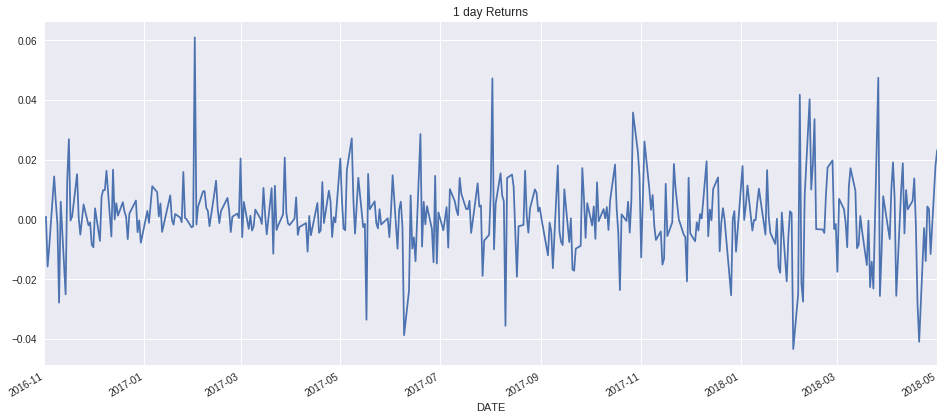

In [0]:
close_price['1DReturns'].plot(figsize = (16,7), title = "1 day Returns")

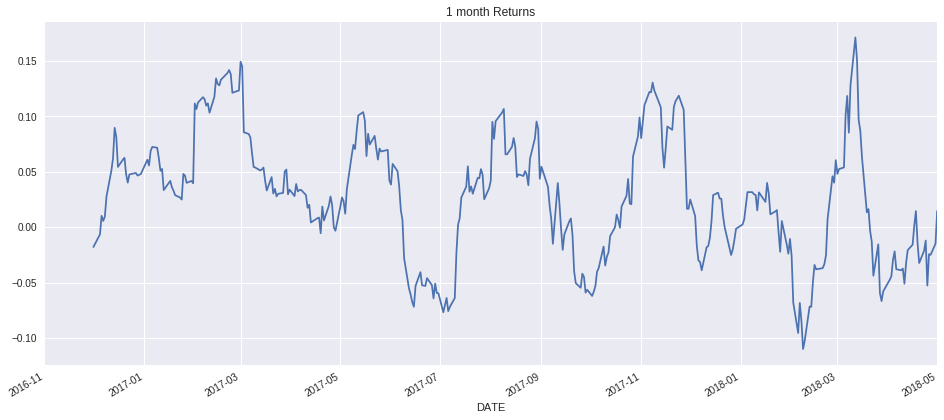

In [0]:
close_price['1MReturns'].plot(figsize = (16,7), title = "1 month Returns")